EE374 Project

*Importing libraries*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defining properties

In [2]:
#initialize time vector
sampling_frequency = 200
signal_duration = 2
time = np.arange(signal_duration*sampling_frequency*10)/(10*sampling_frequency)  
 #To make the function seem smoother, the time vector has is multiplied with 10.
 #This is not a problem for sampling if because the modulated signal will be sampled 10 times less frequently.

[0.0000e+00 5.0000e-04 1.0000e-03 ... 1.9985e+00 1.9990e+00 1.9995e+00]


Defining message source

(0.0, 0.1, -2.0, 2.0)

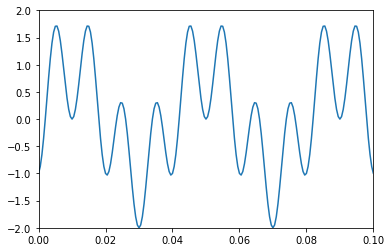

In [3]:
message = np.sin(50*np.pi*time) - np.cos(200*np.pi*time)

#it's important to see the shape of the signal
plt.plot(time,message)
plt.axis([0 , 0.1 , -2 , 2])

Defining quantization levels

In [4]:
message_max = np.max(message)
message_min = np.min(message)
step = (message_max - message_min)/127  #we divide by 127 because there will be 127 spaces between 128 level lines

quantas = np.arange(message_min , message_max +step ,step ) #this makes a list for the quantization values



*Printing the binary values of Pulse Code Modulated signal*

In [27]:
Ts = 1/sampling_frequency #this is not used

for i in range(1,11):
  decimaldata = (message[10*i] - message_min)//step   #As it mentioned earlier the modulated signal is sampled 10 times less frequently.
  # according to this modulation, the minimum value of the message is the 00000000
  print(bin(int(decimaldata))[2:].zfill(7))     #the decimal value is converted to binary and printed as 7-bits

0110010
1010001
1101111
1111110
1111001
1100100
1001101
1000100
1001101
1100100


*Defining Delta Modulation Properties*

In [29]:
#Start of the 2nd Question
delta_sampling_frequency = 4*sampling_frequency   #this time the sampling frequency is 4 times the Nyquist freq.
delta_step = 0.2    #delta step is defined accourding to the email

time = np.arange(signal_duration*delta_sampling_frequency*10)/(10*delta_sampling_frequency)
message = np.sin(50*np.pi*time) - np.cos(200*np.pi*time)

delta_modulated_signal_str = ""   #this list will store the ones and zeros of the delta modulation
delta_modulated_signal_int = 0    #this integer will store the instantaneous value of the delta modulated signal

delta_graph_list= []    #this list will be used to graph the modulated signal



*Printing the Delta Modulated Signal*

In [30]:
delta_modulated_signal_str = ""

for i in range(0,21):
  if(message[10*i] >= delta_modulated_signal_int):    #here, if the message signal is larger than the delta modulation; 
    delta_modulated_signal_str += "1"                 #the '1' bit will be added to the signal
    delta_modulated_signal_int += delta_step          #and the delta modulated signal will be increased by delta step
    for j in range(100):                #this 'for loop' is to save the delta modulated signal at the current value
      delta_graph_list.append(delta_modulated_signal_int)
      
  else:
    delta_modulated_signal_str += "0"                #here, is the same but the minus one          
    delta_modulated_signal_int -=delta_step
    for j in range(100):
      delta_graph_list.append(delta_modulated_signal_int)

print(delta_modulated_signal_str)

001111100111110000001


*Let's check if the shapes of the message signal and the modulated signal are similar :)*

(0.0, 0.25, -2.0, 2.0)

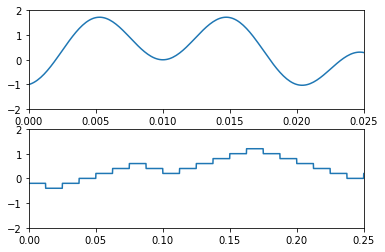

In [33]:
plt.subplot(2, 1, 1)
plt.plot(time,message)
plt.axis([0 , 0.025 , -2 , 2])

plt.subplot(2, 1, 2)
plt.plot(time[:2100],delta_graph_list)
plt.axis([0 , 0.25 , -2 , 2])

**YES THEY ARE!!**